In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#Defining Constant
G = 6.674*10**(-11) #m^3/kg s^2
Msun = 1.989*10**30 #kg
AU = 1.496*10**11 #m
#1 is ACB, 2 is ACA, 3 is Barnard's
M1 = 9.07 * Msun
M2 = 1.10 * Msun
M3 = 0.144* Msun


x1 = float(input("please provide a real value for x1 in units of AU: ")) * AU
y1 = float(input("please provide a real value for y1 in units of AU: ")) * AU
x1p = float(input("please provide a real value for x1 velocity in units of AU/s: ")) * AU
y1p = float(input("please provide a real value for y1 velocity in units of AU/s: ")) * AU

x2 = float(input("please provide a real value for x2 in units of AU/s: ")) * AU
y2 = float(input("please provide a real value for y2 in units of AU/s: ")) * AU
x2p = float(input("please provide a real value for x2 velocity in units of AU/s: ")) * AU
y2p = float(input("please provide a real value for y2 velocity in units of AU/s: ")) * AU

x3 = float(input("please provide a real value for x3 in units of AU: ")) * AU
y3 = float(input("please provide a real value for y3 in units of AU: ")) * AU
x3p = float(input("please provide a real value for x3 velocity in units of AU/s: ")) * AU
y3p = float(input("please provide a real value for y3 velocity in units of AU/s: ")) * AU

#dist between 1 and 2 is 23 AU
array = np.array([x1, y1, x1p, y1p,
                  x2, y2, x2p, y2p,
                  x3, y3, x3p, y3p], float)
array2 = array
#dist between 1 and 2 is 23 AU
#array = np.array([0, 0, 0, 0,
#            2*AU, 0, 0, -.5*AU,
#            -.5*AU, 0, 0, 2*AU], float)

#array = np.array([x1, y1, x1p, y1p, x2, y2, x2p, y2p, x3, y3, x3p, y3p], float)

#setting the array values to appropriate vars
x1 = array[0]
y1 = array[1]
x2 = array[4]
y2 = array[5]
x3 = array[8]
y3 = array[9]

startpoints = np.array([[x1,x2,x3],[y1,y2,y3]],float)

#distances between each other
r12 = ((x2-x1)**2+(y2-y1)**2)**(1/2)
r23 = ((x3-x2)**2+(y3-y2)**2)**(1/2)
r13 = ((x3-x1)**2+(y3-y1)**2)**(1/2)

#we define a function to represent our system of equations
def f(r,t):
    #setting vars for M1
    u1 = array[0] #x1
    u2 = array[1] #y1
    u3 = array[2] #x1p
    u4 = array[3] #y1p

    #setting vars for M2
    u5 = array[4] #x2
    u6 = array[5] #y2
    u7 = array[6] #x2p
    u8 = array[7] #y2p

    #setting vars for
    u9 = array[8] #x3
    u10 = array[9] #y3
    u11 = array[10] #x3p
    u12 = array[11] #y3p

#this is for M1
    u1p = u3 #deriv of pos is equal to velocity, x version
    u2p = u4 #deriv of pos is equal to velocity, y version
    u3p = G*M2/(r12**3)*(u5-u1)+G*M3/(r13**3)*(u9-u1) #x acceleration
    u4p = G*M2/(r12**3)*(u6-u2)+G*M3/(r13**3)*(u10-u2) #y acceleration

#this is for M2
    u5p = u7 #deriv of pos is equal to velocity
    u6p = u8
    u7p = G*M1/(r12**3)*(u1-u5)+G*M3/(r23**3)*(u9-u5)
    u8p = G*M1/(r12**3)*(u2-u6)+G*M3/(r23**3)*(u10-u6)

#this is for M3
    u9p = u11 #deriv of pos is equal to velocity
    u10p = u12
    u11p = G*M1/(r13**3)*(u1-u9)+G*M2/(r23**3)*(u5-u9)
    u12p = G*M1/(r13**3)*(u2-u10)+G*M2/(r23**3)*(u6-u10)

    #then we have equations which are our desired outputs
    #we can basically treat derivatives as simple variables

    return np.array([u1p,u2p,u3p,u4p,u5p,u6p,u7p,u8p,u9p,u10p,u11p,u12p],float)

#set up our time limits over which to look at the populations
a = 0.0
b = 10** float(input("please provide a real value for n, for the equation t=10^n: "))
N = 100000
h = (b-a)/N

#set a time array and empty lists for x and y
tpoints = np.arange(a,b,h)

#making empty lists :(
l_x1, l_y1, l_vx1, l_vy1, l_x2, l_y2, l_vx2, l_vy2, l_x3, l_y3, l_vx3, l_vy3 = [], [], [], [], [], [], [], [], [], [], [], []

#Runge-kutta method
for t in tpoints:
    #we append the values to the lists
    l_x1.append(array[0])
    l_y1.append(array[1])
    l_vx1.append(array[2])
    l_vy1.append(array[3])
    l_x2.append(array[4])
    l_y2.append(array[5])
    l_vx2.append(array[6])
    l_vy2.append(array[7])
    l_x3.append(array[8])
    l_y3.append(array[9])
    l_vx3.append(array[10])
    l_vy3.append(array[11])

    #then we run through all our k's
    k1 = h*f(array,t)
    k2 = h*f(array+0.5*k1,t+0.5*h)
    k3 = h*f(array+0.5*k2,t+0.5*h)
    k4 = h*f(array+k3,t+h)
    #and add it on to the previous value of array
    array += (k1 + 2*k2 + 2*k3 + k4)/6

please provide a real value for x1 in units of AU: 0
please provide a real value for y1 in units of AU: 0
please provide a real value for x1 velocity in units of AU/s: 0
please provide a real value for y1 velocity in units of AU/s: 0
please provide a real value for x2 in units of AU/s: 1
please provide a real value for y2 in units of AU/s: 0
please provide a real value for x2 velocity in units of AU/s: 0
please provide a real value for y2 velocity in units of AU/s: 5
please provide a real value for x3 in units of AU: -4
please provide a real value for y3 in units of AU: 0
please provide a real value for x3 velocity in units of AU/s: 0
please provide a real value for y3 velocity in units of AU/s: -2
please provide a real value for n, for the equation t=10^n: 3


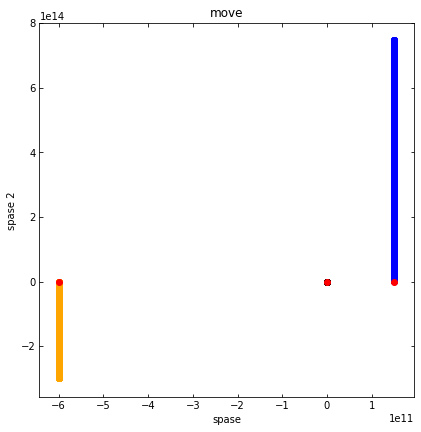

In [10]:
#MAKING THE PLOT
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01
rect_scatter = [left, bottom, width, height]
# start with a rectangular Figure
plt.figure(figsize=(8, 8))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# the scatter plot:
ax_scatter.scatter(l_x1, l_y1, color = 'k', alpha = .01)
ax_scatter.scatter(l_x2, l_y2, color = 'b', alpha = .01)
ax_scatter.scatter(l_x3, l_y3, color = 'orange', alpha = .01)
ax_scatter.scatter(startpoints[0],startpoints[1],color= 'r')
#limits
#ax_scatter.set_xlim(1, rmax)
#Formatting, Labels, & Legends
plt.xlabel('spase')
plt.ylabel('spase 2')
plt.title('move')
plt.show()


please provide a real value for n, for the equation t=10^n: 8


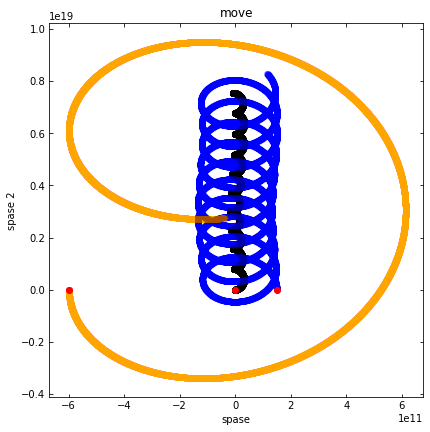

In [11]:
startpoints = np.array([[x1,x2,x3],[y1,y2,y3]],float)

#distances between each other
r12 = ((x2-x1)**2+(y2-y1)**2)**(1/2)
r23 = ((x3-x2)**2+(y3-y2)**2)**(1/2)
r13 = ((x3-x1)**2+(y3-y1)**2)**(1/2)

#we define a function to represent our system of equations
def f(r,t):
    #setting vars for M1
    u1 = array2[0] #x1
    u2 = array2[1] #y1
    u3 = array2[2] #x1p
    u4 = array2[3] #y1p

    #setting vars for M2
    u5 = array2[4] #x2
    u6 = array2[5] #y2
    u7 = array2[6] #x2p
    u8 = array2[7] #y2p

    #setting vars for
    u9 = array2[8] #x3
    u10 = array2[9] #y3
    u11 = array2[10] #x3p
    u12 = array2[11] #y3p

#this is for M1
    u1p = u3 #deriv of pos is equal to velocity, x version
    u2p = u4 #deriv of pos is equal to velocity, y version
    u3p = G*M2/(r12**3)*(u5-u1)+G*M3/(r13**3)*(u9-u1) #x acceleration
    u4p = G*M2/(r12**3)*(u6-u2)+G*M3/(r13**3)*(u10-u2) #y acceleration

#this is for M2
    u5p = u7 #deriv of pos is equal to velocity
    u6p = u8
    u7p = G*M1/(r12**3)*(u1-u5)+G*M3/(r23**3)*(u9-u5)
    u8p = G*M1/(r12**3)*(u2-u6)+G*M3/(r23**3)*(u10-u6)

#this is for M3
    u9p = u11 #deriv of pos is equal to velocity
    u10p = u12
    u11p = G*M1/(r13**3)*(u1-u9)+G*M2/(r23**3)*(u5-u9)
    u12p = G*M1/(r13**3)*(u2-u10)+G*M2/(r23**3)*(u6-u10)

    #then we have equations which are our desired outputs
    #we can basically treat derivatives as simple variables

    return np.array([u1p,u2p,u3p,u4p,u5p,u6p,u7p,u8p,u9p,u10p,u11p,u12p],float)

#set up our time limits over which to look at the populations
a = 0.0
b =  10** float(input("please provide a real value for n, for the equation t=10^n: "))
N = 100000
h = (b-a)/N

#set a time array and empty lists for x and y
tpoints = np.arange(a,b,h)

#making empty lists :(
l_x1, l_y1, l_vx1, l_vy1, l_x2, l_y2, l_vx2, l_vy2, l_x3, l_y3, l_vx3, l_vy3 = [], [], [], [], [], [], [], [], [], [], [], []

#Runge-kutta method
for t in tpoints:
    #we append the values to the lists
    l_x1.append(array[0])
    l_y1.append(array[1])
    l_vx1.append(array[2])
    l_vy1.append(array[3])
    l_x2.append(array[4])
    l_y2.append(array[5])
    l_vx2.append(array[6])
    l_vy2.append(array[7])
    l_x3.append(array[8])
    l_y3.append(array[9])
    l_vx3.append(array[10])
    l_vy3.append(array[11])

    #then we run through all our k's
    k1 = h*f(array2,t)
    k2 = h*f(array2+0.5*k1,t+0.5*h)
    k3 = h*f(array2+0.5*k2,t+0.5*h)
    k4 = h*f(array2+k3,t+h)
    #and add it on to the previous value of array
    array2 += (k1 + 2*k2 + 2*k3 + k4)/6

#MAKING THE PLOT
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01
rect_scatter = [left, bottom, width, height]
# start with a rectangular Figure
plt.figure(figsize=(8, 8))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# the scatter plot:
ax_scatter.scatter(l_x1, l_y1, color = 'k', alpha = .01)
ax_scatter.scatter(l_x2, l_y2, color = 'b', alpha = .01)
ax_scatter.scatter(l_x3, l_y3, color = 'orange', alpha = .01)
ax_scatter.scatter(startpoints[0],startpoints[1],color= 'r')
#limits
#ax_scatter.set_xlim(1, rmax)
#Formatting, Labels, & Legends
plt.xlabel('spase')
plt.ylabel('spase 2')
plt.title('move')
plt.show()
